## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [2]:
from TCGame_Env1 import TicTacToe# - import your class from environment file
import collections
import numpy as np
import random
import pickle
from time import time
from matplotlib import pyplot as plt

In [7]:
env=TicTacToe()

In [8]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [9]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [10]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        Q_dict[state1]={}
        States_track[state1]={}
        for action in valid_act:
            Q_dict[state1][action]=0
            States_track[state1][action]=[0]

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [11]:
def exploit(eps):
    """Randomizes a number to select
    whether or not to expolit"""
    return np.random.uniform() > eps

In [12]:
max_epsilon = 1.0
min_epsilon = 0.001
time1 = np.arange(0,600000)
epsilon = []
for i in range(0,600000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.00001*i))

#### Tracking the state-action pairs for checking convergence - write your code here

In [13]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = dict()
States_track = dict()

In [14]:
# Initialise states to be tracked
def initialise_tracking_states():
    state = np.empty((1,9))
    state[:]=np.nan
    add_to_dict(state[0])
    return state[0]

In [15]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [16]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [17]:
#initialise_tracking_states()

#### Define hyperparameters  ---write your code here

In [18]:
lr=0.01#learning rate
gamma=0.8

### Q-update loop ---write your code here

In [21]:
start_time = time()
delta=[]
EPISODES=600000-10#Running for low nos because brower is hanging and getting shutdown
for episode in range(EPISODES):
    ##### Start writing your code from the next line
    terminal=False
    state=initialise_tracking_states()#initializing empty state as all empty
    biggest_change=0
    while not terminal:
        add_to_dict(state)#for adding new states to dictionary
        ep=epsilon[episode]#coressponding epsilon value
        if exploit(ep):
            action = max(Q_dict[Q_state(state)], key=Q_dict[Q_state(state)].get)#explitation
        else:
            action = random.choice(list(Q_dict[Q_state(state)].keys()))#exploration
        state1=state.copy()
        #print(state)
        movement=env.step(state1,action)#calling step function
        r=movement[0]
        next_state=movement[1]
        terminal=movement[2]
        old_q=Q_dict[Q_state(state)][action]
        add_to_dict(next_state)
        if terminal:
            Q_dict[Q_state(state)][action] += lr*(r-Q_dict[Q_state(state)][action])#improving Q for terminal state
        else:
            new_action = max(Q_dict[Q_state(next_state)], key=Q_dict[Q_state(next_state)].get)
            #improving Q for non-terminal state
            Q_dict[Q_state(state)][action] += lr*(r + gamma*(Q_dict[Q_state(next_state)][new_action]) - Q_dict[Q_state(state)][action])
        biggest_change = max(biggest_change, np.abs(Q_dict[Q_state(state)][action] - old_q))
        state=next_state
    delta.append(biggest_change)
    if (episode+1)%100000==0:
        save_obj(States_track,'States_tracked'+str(episode))#saving object state track  
        save_obj(Q_dict,'Policy'+str(episode))#saving object Q dictionary
    if (episode+1)%5000==0:
        save_tracking_states()    
    if (episode-1)%50000==0:
        print('No of episodes : ',episode)    
end_time = time()    
elapsed_time = end_time - start_time
save_obj(States_track,'States_tracked'+str(episode))   
save_obj(Q_dict,'Policy'+str(episode))

No of episodes :  1
No of episodes :  50001
No of episodes :  100001
No of episodes :  150001
No of episodes :  200001
No of episodes :  250001
No of episodes :  300001
No of episodes :  350001
No of episodes :  400001
No of episodes :  450001
No of episodes :  500001
No of episodes :  550001


In [46]:
dbfile = open('Policy.pkl', 'rb') #loading policy saved after 2million iteration for Q_dict only    
Q_dict = pickle.load(dbfile)

#### Check the Q-dictionary

In [47]:
Q_dict

{'x-x-x-x-x-x-x-x-x': {(0, 1): -1.321875470262429,
  (0, 3): -1.2922545553568483,
  (0, 5): -1.325070123621457,
  (0, 7): -1.3187455671139023,
  (0, 9): -1.325120050699215,
  (1, 1): -1.3204009932052814,
  (1, 3): -0.8841196940562498,
  (1, 5): -1.307048232076974,
  (1, 7): -1.3222646302814853,
  (1, 9): -1.3109976419977207,
  (2, 1): -1.3067011748521877,
  (2, 3): -1.3150765409389202,
  (2, 5): -1.3132063738204074,
  (2, 7): 3.0839800086774387,
  (2, 9): -1.307173503525775,
  (3, 1): -1.3260805592931604,
  (3, 3): -1.3196355943552698,
  (3, 5): -1.3219850724301432,
  (3, 7): -1.3221547319246139,
  (3, 9): -1.3136659746667745,
  (4, 1): -1.3243476188247285,
  (4, 3): -1.3166410975452207,
  (4, 5): -1.3228425767835157,
  (4, 7): -1.3188297808167155,
  (4, 9): -1.3207678552349473,
  (5, 1): -1.3257396036336584,
  (5, 3): -1.3127291849242362,
  (5, 5): -1.327084814398777,
  (5, 7): -1.3237898621073954,
  (5, 9): -1.3300274759984734,
  (6, 1): -1.321603633807352,
  (6, 3): -1.3196010347052

In [48]:
len(Q_dict)

2415827

In [49]:
# try checking for one of the states - that which action your agent thinks is the best  -----This will not be evaluated
#random_state=random.choice(list(Q_dict.keys()))
random_state='1.0-x-9.0-x-2.0-x-4.0-x-x'

In [53]:
print(random_state)  
print('Best action',max(Q_dict[random_state], key=Q_dict[random_state].get))

1.0-x-9.0-x-2.0-x-4.0-x-x
Best action (1, 5)


In [51]:
Q_dict[random_state]

{(1, 3): -0.01,
 (1, 5): 0.6793465209301,
 (1, 7): 0,
 (3, 3): -0.0092,
 (3, 5): 0,
 (3, 7): -0.01,
 (5, 3): -0.0199,
 (5, 5): -0.01,
 (5, 7): -0.01,
 (7, 3): 0,
 (7, 5): 0,
 (7, 7): 0,
 (8, 3): 0,
 (8, 5): -0.01,
 (8, 7): 0}

#### Check the states tracked for Q-values convergence
(non-evaluative)

In [54]:
dbfile = open('States_tracked.pkl', 'rb') #loading policy saved after 2million iteration for Q_dict only    
States_tracked = pickle.load(dbfile)

In [55]:
state='x-x-x-x-x-x-x-x-x'
States_tracked[state].keys()

dict_keys([(0, 1), (0, 3), (0, 5), (0, 7), (0, 9), (1, 1), (1, 3), (1, 5), (1, 7), (1, 9), (2, 1), (2, 3), (2, 5), (2, 7), (2, 9), (3, 1), (3, 3), (3, 5), (3, 7), (3, 9), (4, 1), (4, 3), (4, 5), (4, 7), (4, 9), (5, 1), (5, 3), (5, 5), (5, 7), (5, 9), (6, 1), (6, 3), (6, 5), (6, 7), (6, 9), (7, 1), (7, 3), (7, 5), (7, 7), (7, 9), (8, 1), (8, 3), (8, 5), (8, 7), (8, 9)])

### Convergence of Q value for 4 state action pair 

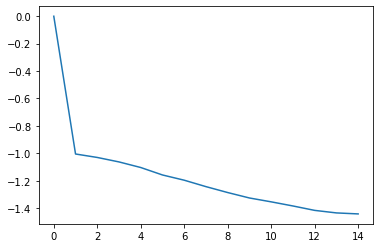

In [56]:
a=States_tracked[state][(0,1)]
plt.plot(a)

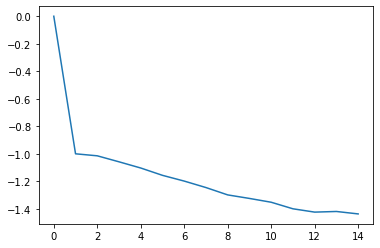

In [57]:
a=States_tracked[state][(4,1)]
plt.plot(a)

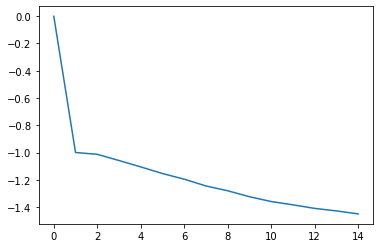

In [58]:
a=States_tracked[state][(7,9)]
plt.plot(a)

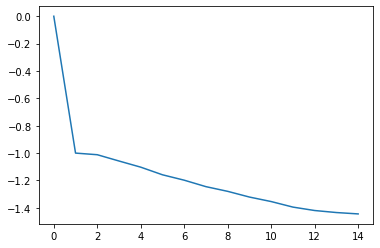

In [59]:
a=States_tracked[state][(8,1)]
plt.plot(a)

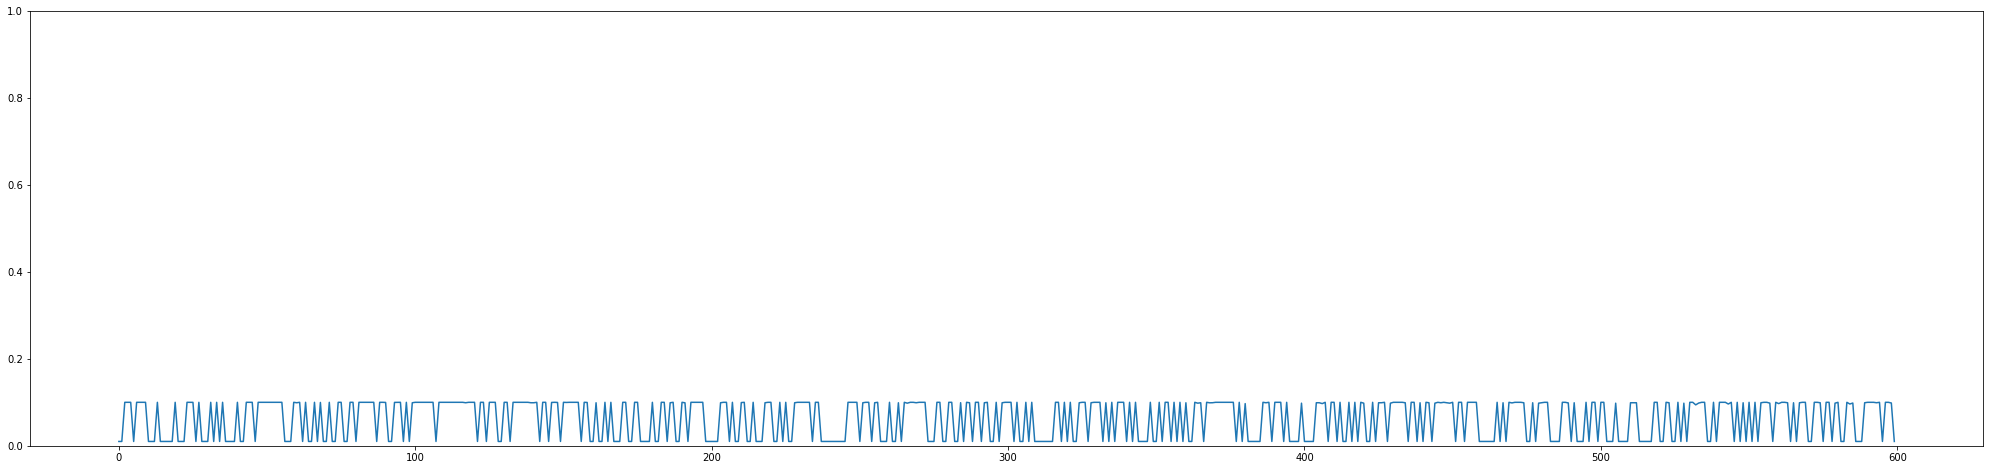

In [41]:
# delta
plt.figure(figsize=(35,8))
time1 = np.arange(0,len(delta))
plt.ylim(0,1)
plt.plot(delta[::1000])
plt.show()

### Epsilon - decay check

In [5]:
max_epsilon = 1.0
min_epsilon = 0.001
time1 = np.arange(0,600000)
epsilon = []
for i in range(0,600000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.00001*i))

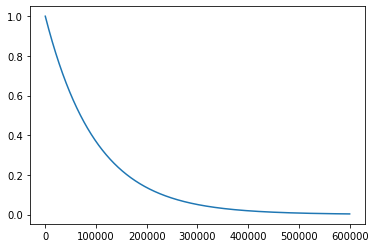

In [6]:
plt.plot(time1, epsilon)
plt.show()